In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Toyota = pd.read_csv("Toyoto_corrola.csv")
Toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [4]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
Toyota.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


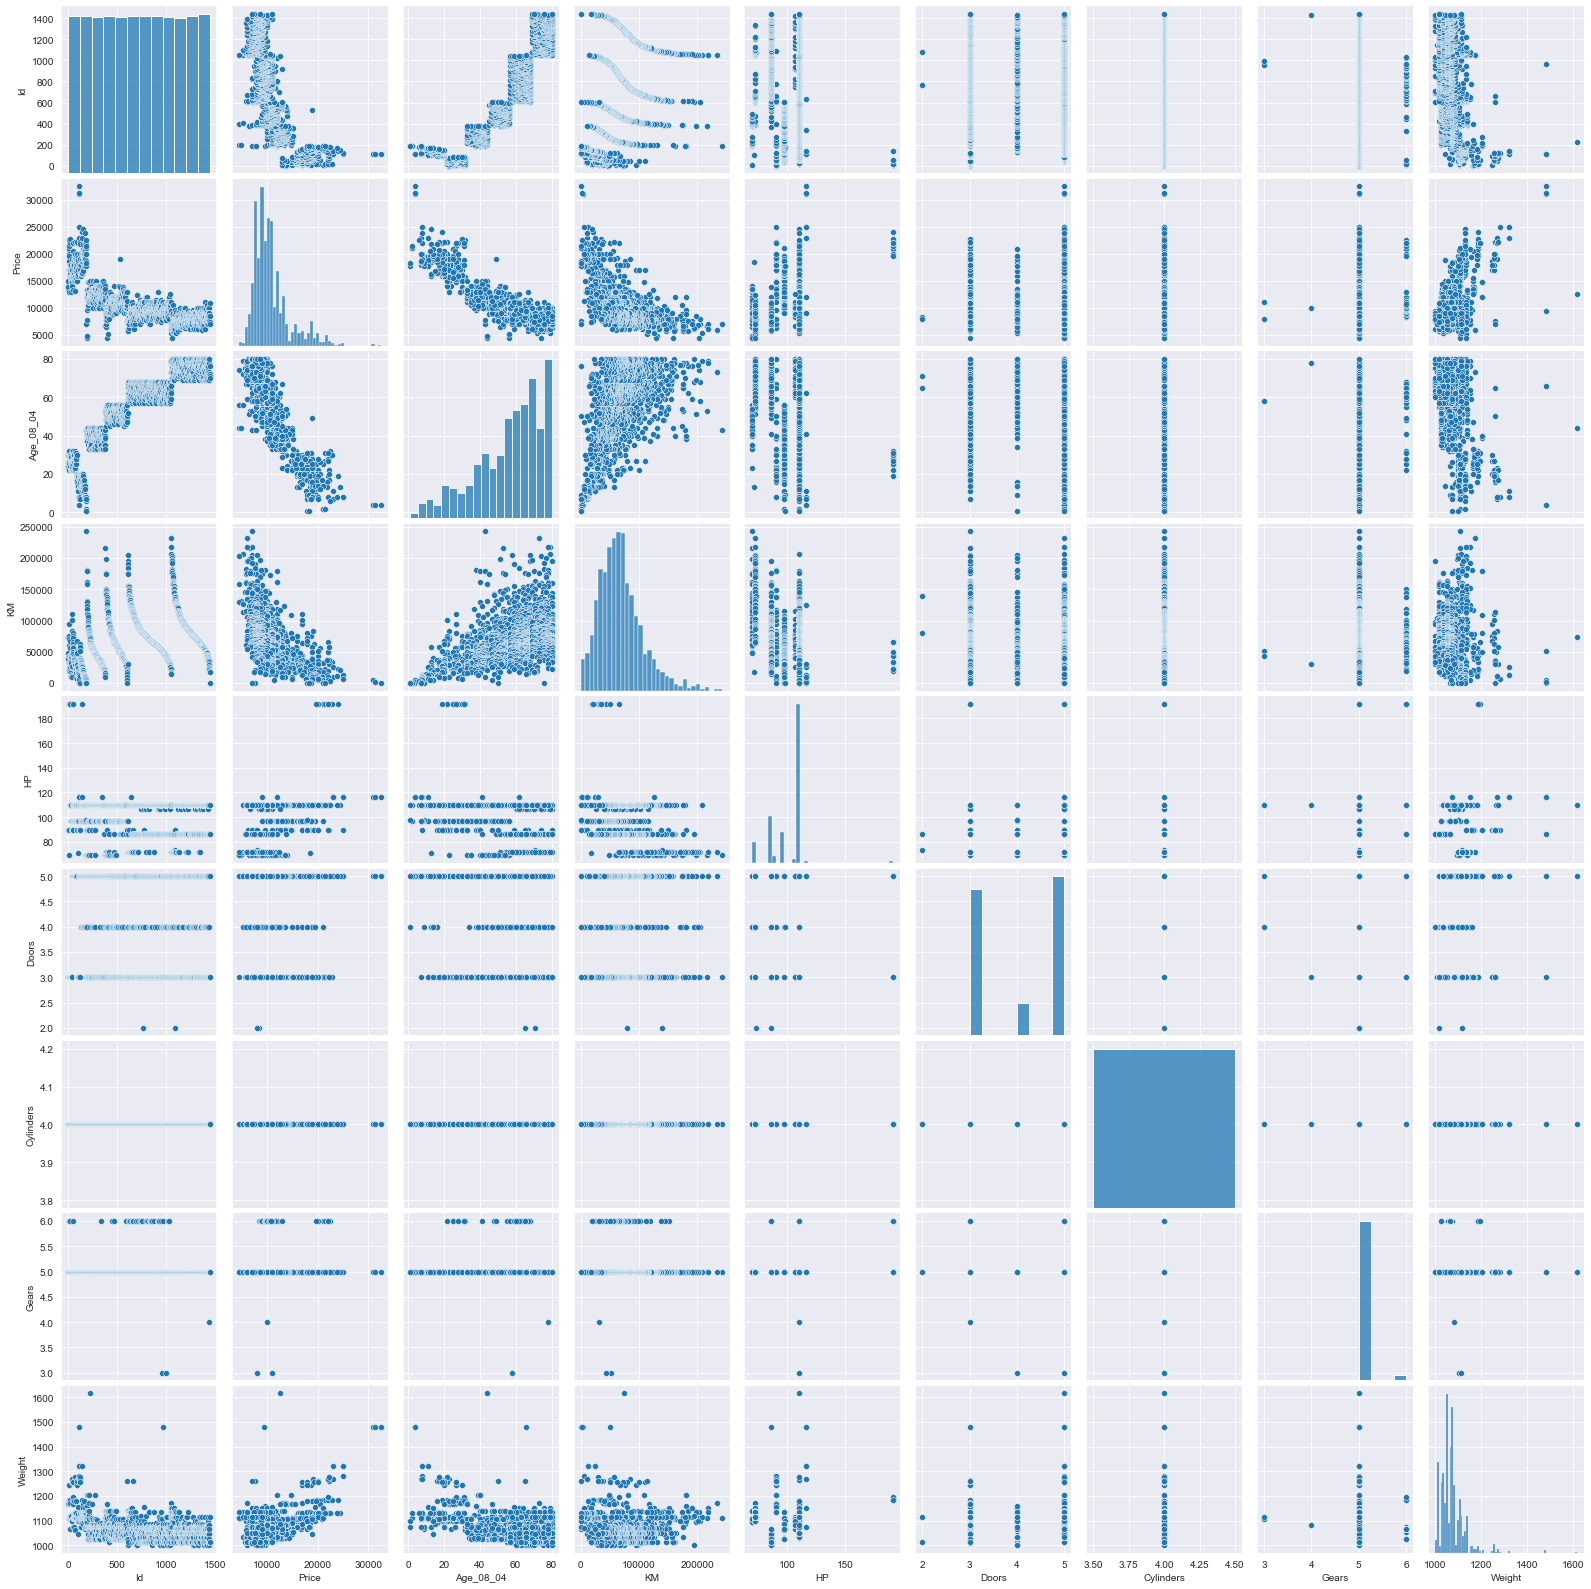

In [13]:
sns.set_style(style = "darkgrid")
sns.pairplot(Toyota)

In [19]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight",data = Toyota).fit()

In [20]:
ml_A = smf.ols("Price~Age_08_04",data = Toyota).fit()
print(ml_A.tvalues,ml_A.pvalues)
ml_A.summary()

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 Intercept    0.0
Age_08_04    0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:13:23   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
ml_D = smf.ols("Price~Doors",data = Toyota).fit()
print(ml_D.tvalues,ml_D.pvalues)
ml_D.summary()

Intercept    19.258097
Doors         7.141657
dtype: float64 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           1.46e-12
Time:                        18:13:26   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
ml_AD = smf.ols("Price~Age_08_04+Doors",data = Toyota).fit()
print(ml_AD.tvalues,ml_AD.pvalues)
ml_AD.summary()

Intercept    74.122486
Age_08_04   -67.999048
Doors         4.426669
dtype: float64 Intercept    0.00000
Age_08_04    0.00000
Doors        0.00001
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2420.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:13:31   Log-Likelihood:                -12747.
No. Observations:                1436   AIC:                         2.550e+04
Df Residuals:                    1433   BIC:                         2.552e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.933e+04    260.848     74.122      0.000    1.88e+04    1.98e+04
Age_08_04   -169.2985      2.490    -67.999      0.000    -174.182    -164.415
Doors        215.1763     48.609      4.427      0.000     119.824     310.529
==============================================================================
Omnibus:                      362.843   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2910.037
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.712   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
rsq_age_08_04 = smf.ols("Age_08_04~Price+HP+Doors+Cylinders+Gears+Weight",data = Toyota).fit().rsquared
vif_age_08_04 = 1/(1-rsq_age_08_04)

In [24]:
rsq_pr = smf.ols("Price~Age_08_04+HP+Doors+Cylinders+Gears+Weight",data = Toyota).fit().rsquared
vif_pr = 1/(1-rsq_pr)

In [25]:
rsq_hp = smf.ols("HP~Age_08_04+Price+Doors+Cylinders+Gears+Weight",data = Toyota).fit().rsquared
vif_hp = 1/(1-rsq_hp)

In [26]:
rsq_doors = smf.ols("Doors~Age_08_04+Price+HP+Cylinders+Gears+Weight",data = Toyota).fit().rsquared
vif_doors = 1/(1-rsq_doors)

In [27]:
rsq_cy = smf.ols("Cylinders~Age_08_04+Price+Doors+Gears+Weight",data = Toyota).fit().rsquared
vif_cy = 1/(1-rsq_cy)

In [28]:
rsq_gr = smf.ols("Gears~Age_08_04+Price+HP+Cylinders+Doors+Weight",data = Toyota).fit().rsquared
vif_gr = 1/(1-rsq_gr)

In [29]:
rsq_wt = smf.ols("Weight~Age_08_04+Price+HP+Doors+Cylinders+Gears",data = Toyota).fit().rsquared
vif_wt = 1/(1-rsq_wt)

In [30]:
d1 = {"variables":["Age_08_04","Price","HP","Doors","Cylinders","Gears","Weight"],'VIF':[vif_age_08_04,vif_pr,vif_hp,vif_doors,vif_cy,vif_gr,vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame
                        

,variables,VIF
0,Age_08_04,4.738822
1,Price,6.117287
2,HP,1.274104
3,Doors,1.149317
4,Cylinders,0.000000
5,Gears,1.089745
6,Weight,1.669535


In [31]:
model.resid

0      -3078.755590
1      -2309.895496
2      -2611.980869
3      -1241.755185
4      -2235.776031
           ...     
1431   -1265.538919
1432    2601.413757
1433      94.503764
1434   -1279.737838
1435   -3687.878866
Length: 1436, dtype: float64

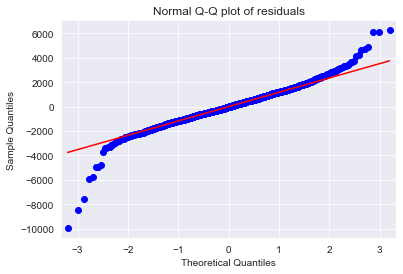

In [32]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [33]:
list(np.where(model.resid>100000))


[array([], dtype=int64)]

In [34]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

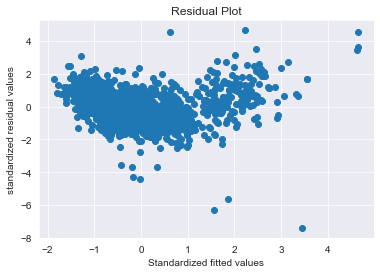

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

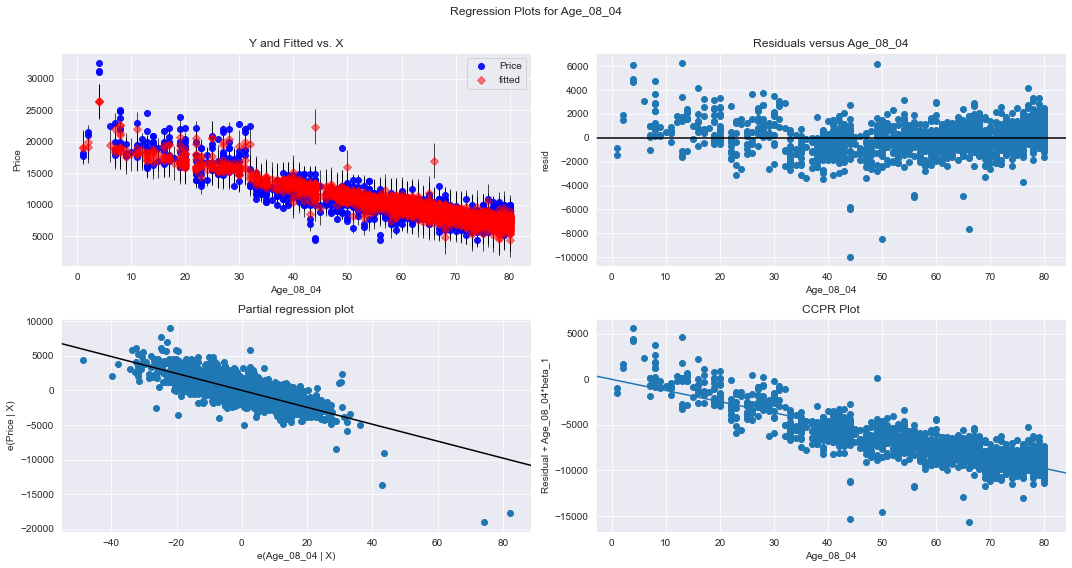

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig = fig)
plt.show()

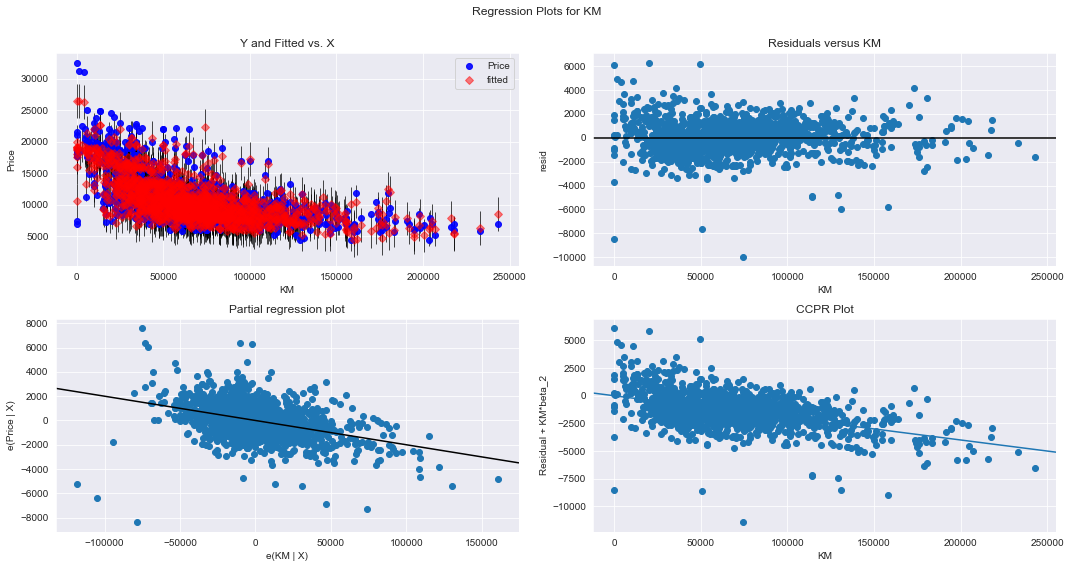

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

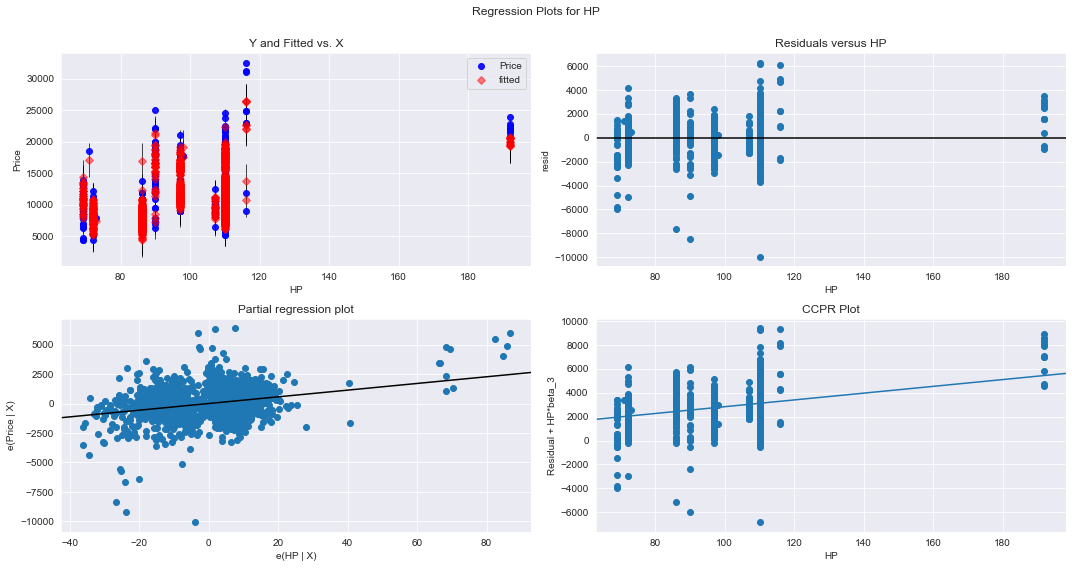

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

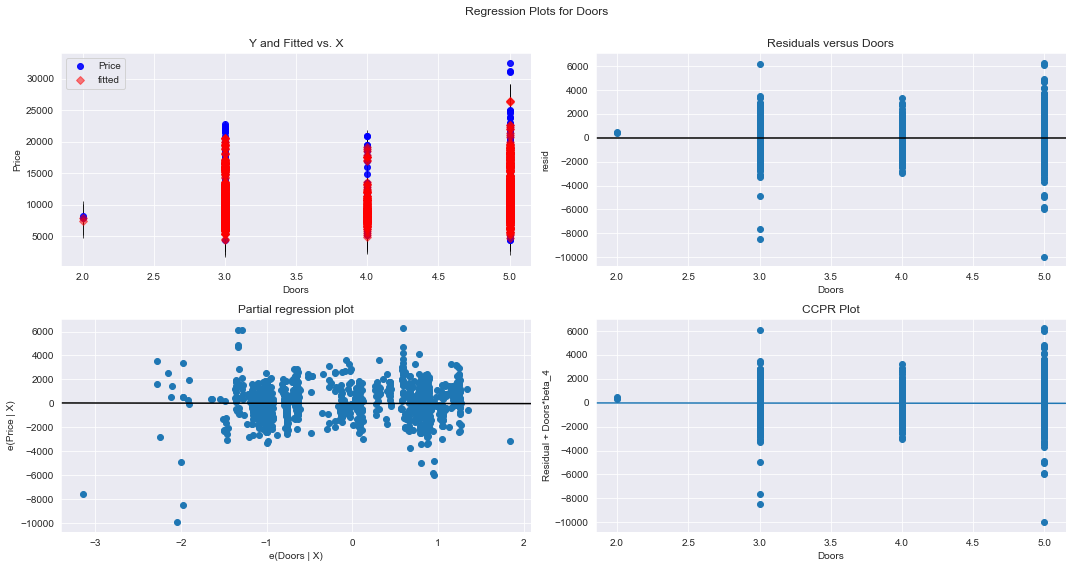

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

ValueError: specify slope and intercepty or model_results

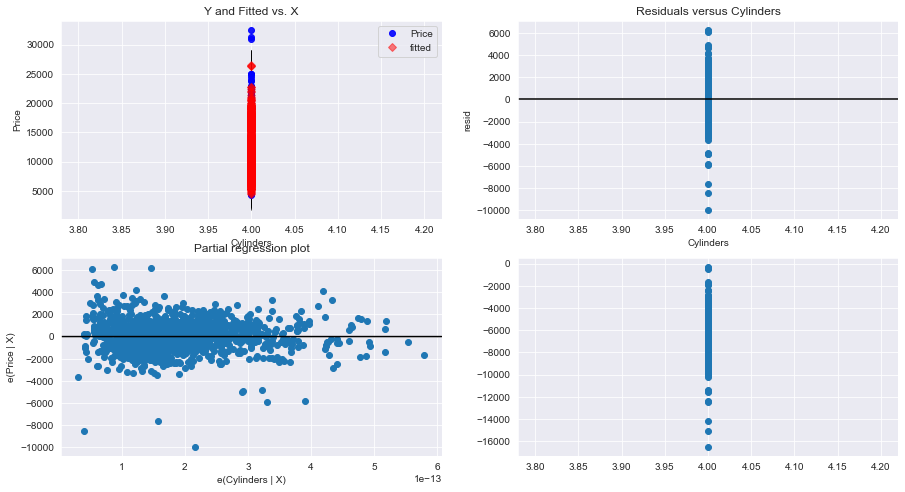

In [40]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Cylinders",fig=fig)
plt.show()

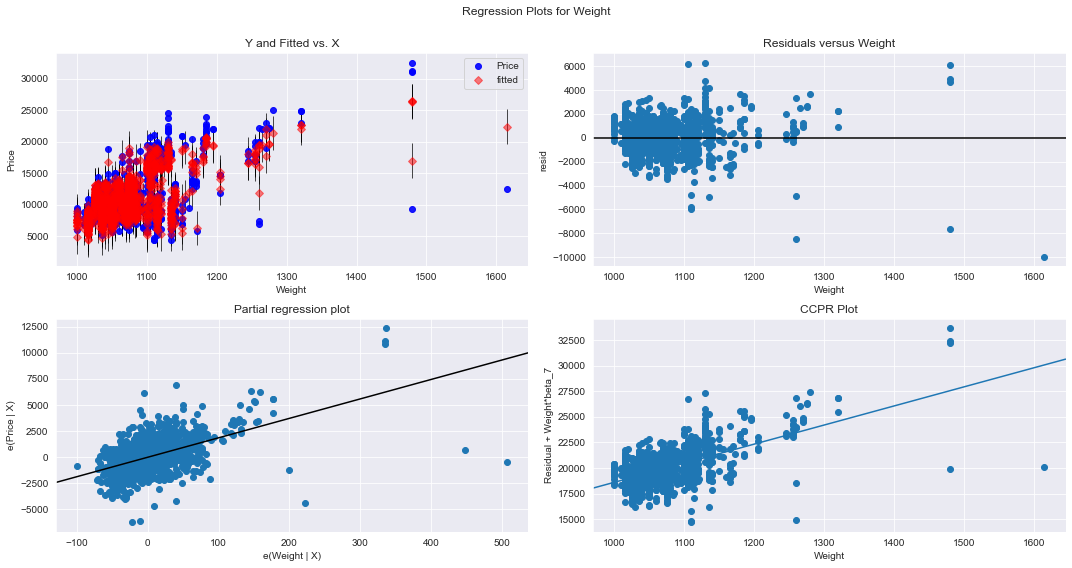

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

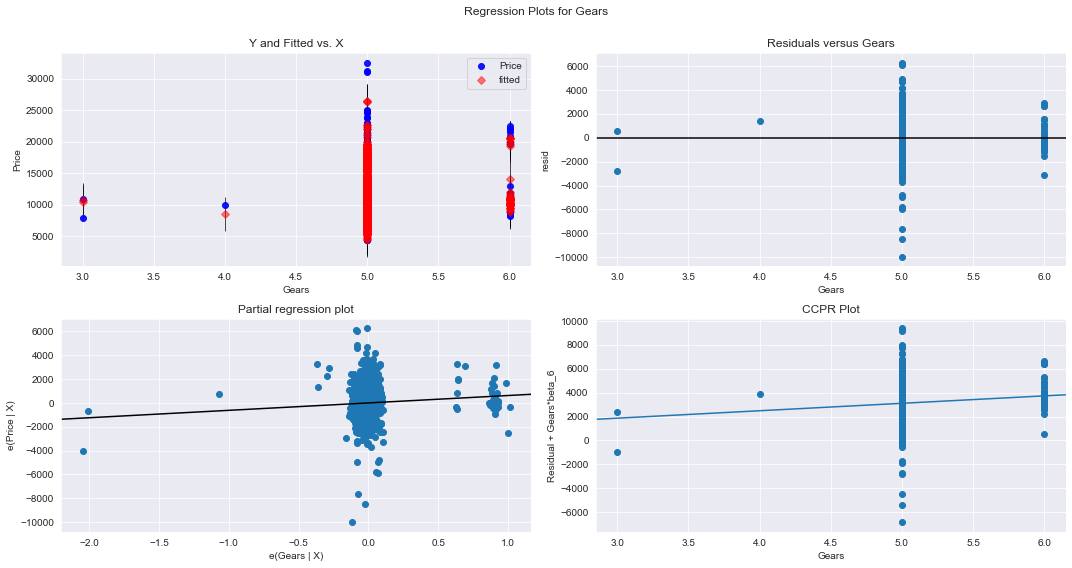

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

In [45]:

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

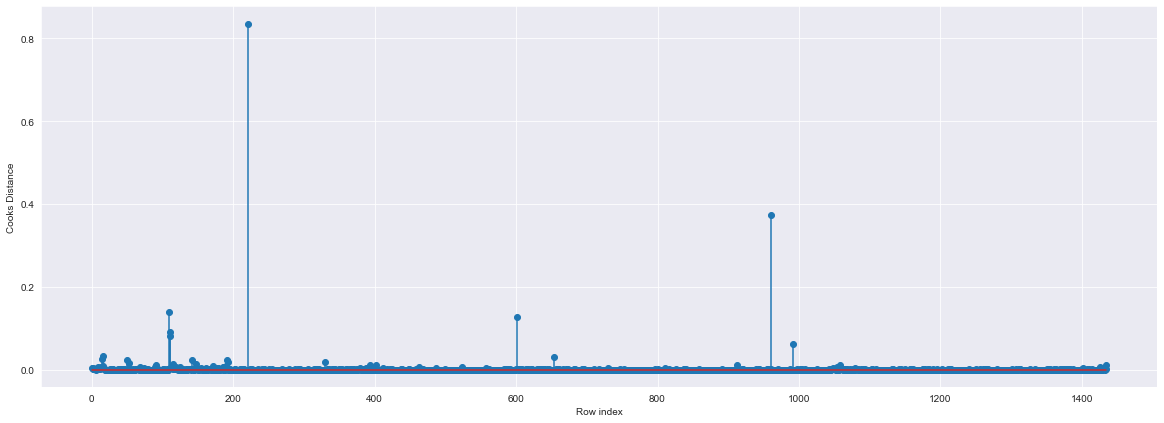

In [46]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(221, 0.8359007508855769)

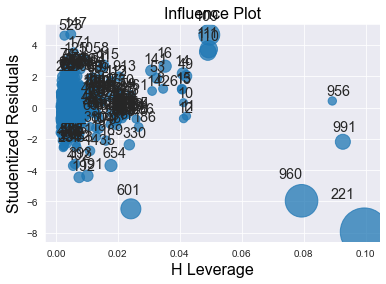

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [51]:
Toyota.shape

(1436, 10)

In [52]:
k=Toyota.shape[1]
n=Toyota.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.02298050139275766

# From the above plot,it is evident that data point 601 and 221 are the high influencers

In [75]:
Toyota[Toyota.index.isin([601,221])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,1,90,3,4,5,1260


In [54]:
Toyota.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [68]:
Toyota_new = pd.read_csv("Toyoto_corrola.csv")

In [59]:
Toyota1 = Toyota_new.drop(Toyota_new.index[960],axis=0).reset_index()
Toyota1

,index,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [69]:
final_ml_A = smf.ols("Price~Age_08_04+KM+HP+Cylinders+Gears",data = Toyota1).fit()
final_ml_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1536.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:29:59   Log-Likelihood:                -12602.
No. Observations:                1435   AIC:                         2.521e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    805.2986     66.010     12.200      0.000     675.811     934.786
Age_08_04   -154.5218      2.599    -59.464      0.000    -159.619    -149.424
KM            -0.0118      0.001     -8.676      0.000      -0.014      -0.009
HP            34.8703      3.033     11.499      0.000      28.922      40.819
Cylinders   3221.1945    264.042     12.200      0.000    2703.244    3739.145
Gears        587.2937    227.096      2.586      0.010     141.818    1032.770
==============================================================================
Omnibus:                      425.005   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3109.236
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       9.816   Cond. No.                     1.46e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.09e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
(final_ml_A.rsquared,final_ml_A.aic)

(0.8111889200970365, 25213.0143002154)

In [71]:
final_ml_D = smf.ols("Price~Weight+HP+Doors+Cylinders+Gears+KM",data = Toyota1).fit()
final_ml_D.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     581.7
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:30:09   Log-Likelihood:                -13001.
No. Observations:                1435   AIC:                         2.601e+04
Df Residuals:                    1429   BIC:                         2.605e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2051.5643    108.907    -18.838      0.000   -2265.199   -1837.929
Weight        40.7516      1.131     36.022      0.000      38.532      42.971
HP            17.9912      4.044      4.448      0.000      10.058      25.925
Doors        -65.5801     62.253     -1.053      0.292    -187.697      56.537
Cylinders  -8206.2572    435.628    -18.838      0.000   -9060.797   -7351.717
Gears        770.8354    305.867      2.520      0.012     170.839    1370.832
KM            -0.0514      0.002    -32.830      0.000      -0.054      -0.048
==============================================================================
Omnibus:                      314.853   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3723.005
Skew:                          -0.667   Prob(JB):                         0.00
Kurtosis:                      10.777   Cond. No.                     1.47e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
(final_ml_D.rsquared,final_ml_D.aic)

(0.6705423746684027, 26013.87995512826)

comparing above R-square and AIC Values,final_ml_D has high R-square and low AIC Value hence include variable"Age" so that multi collinearity problem would be resolved.


In [73]:
model_influence_A = final_ml_A.get_influence()
(c_A,_) = model_influence_A.cooks_distance

Text(0, 0.5, 'Cooks Distance')

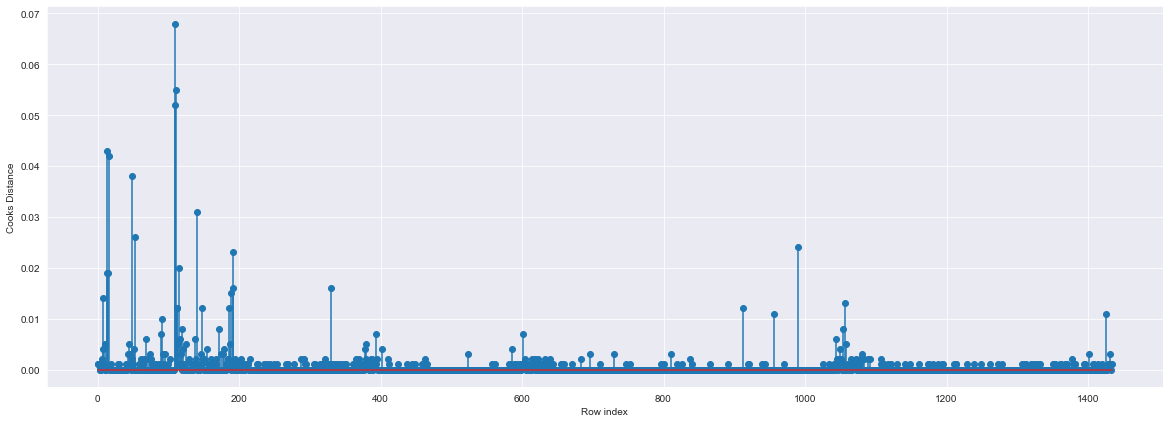

In [65]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Toyota1)),np.round(c_A,3))
plt.xlabel("Row index")
plt.ylabel("Cooks Distance")

In [66]:
(np.argmax(c_A),np.max(c_A))

(109, 0.06773401356385722)

Since the value is <1,we can stop the diagnostic process and finalize the model

In [ ]:
final_ml_D = smf.ols("KM~Price+HP+Doors+Cylinders+Gears+Weight",data = Toyota1).fit()
final_ml_D.summary()

In [ ]:
(final_ml_D.rsquared,final_ml_D.aic)

In [ ]:
new_data = pd.DataFrame({"Age_08_04":25,"Price":14000,"HP":90,"Doors":3,"Cylinders":4,"Gears":5,"Weight":1160},index = [1])
new_data

In [ ]:
final_ml_D.predict(new_data)

In [ ]:
final_ml_D.predict(Toyota_new.iloc[0:5,])

In [ ]:
Toyota.head()

In [ ]:
pred_y = final_ml_D.predict(Toyota_new)

In [ ]:
pred_y